In [17]:
#load all the libraries that will be used for this stage
import numpy as np # used as linear algebra
import pandas as pd # used for data processing
import matplotlib.pyplot as plt # used for ploting
import seaborn as sns # uses for ploting
sns.set(style = "whitegrid") # to give the graphics a particular design
plt.rc("figure", figsize = (20, 10)) # to make all my graph the same size.

In [2]:
#import the Fuel utility dataset (FUD) to be used.
FUD = pd.read_csv(r"C:\Users\lenovo\Desktop\Fuel utility dataset.csv")

In [3]:
FUD.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
#This Feature labels of the dataset seems confusing so i need to adjust for easy understanding
FUD = FUD.rename(columns = {"record_id": "Record ID", "utility_id_ferc1": "Utility ID", "report_year": "Report year", "plant_name_ferc1": "Plant name", "fuel_type_code_pudl": "Fuel type", "fuel_unit": "Fuel unit", "fuel_qty_burned": "Fuel qty burned", "fuel_mmbtu_per_unit": "Fuel per unit(mmbtu)", "fuel_cost_per_unit_burned": "Fuel cost per unit burned", "fuel_cost_per_unit_delivered": "Fuel cost per unit delivered", "fuel_cost_per_mmbtu": "Fuel cost per mmbtu"})
FUD.head()

,Record ID,Utility ID,Report year,Plant name,Fuel type,Fuel unit,Fuel qty burned,Fuel per unit(mmbtu),Fuel cost per unit burned,Fuel cost per unit delivered,Fuel cost per mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [7]:
#Check the datasets thoroughly for proper cleaning and feature engineering
FUD.info()
# Observations: with the output describe below i can see that Fuel unit number of row is incomplete this might be as a result of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Record ID                     29523 non-null  object 
 1   Utility ID                    29523 non-null  int64  
 2   Report year                   29523 non-null  int64  
 3   Plant name                    29523 non-null  object 
 4   Fuel type                     29523 non-null  object 
 5   Fuel unit                     29343 non-null  object 
 6   Fuel qty burned               29523 non-null  float64
 7   Fuel per unit(mmbtu)          29523 non-null  float64
 8   Fuel cost per unit burned     29523 non-null  float64
 9   Fuel cost per unit delivered  29523 non-null  float64
 10  Fuel cost per mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [8]:
#checking for missing values
FUD.isnull().any()
# Observations : This display that Fuel unit has missing values

Record ID                       False
Utility ID                      False
Report year                     False
Plant name                      False
Fuel type                       False
Fuel unit                        True
Fuel qty burned                 False
Fuel per unit(mmbtu)            False
Fuel cost per unit burned       False
Fuel cost per unit delivered    False
Fuel cost per mmbtu             False
dtype: bool

In [9]:
#Checking the total of null values for Fuel unit series
FUD.isnull().sum()
# Observations: The total number of missing value is 180, so this missing values must be fill to continue... How?

Record ID                         0
Utility ID                        0
Report year                       0
Plant name                        0
Fuel type                         0
Fuel unit                       180
Fuel qty burned                   0
Fuel per unit(mmbtu)              0
Fuel cost per unit burned         0
Fuel cost per unit delivered      0
Fuel cost per mmbtu               0
dtype: int64

In [10]:
#Let check what Fuel unit entails and see if we can use either the mean, mode or median
FUD["Fuel unit"].value_counts()
#Observation: we could note this fuel unit is categorical in nature, so the mode will be more preferably which is the mcf (11345)

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: Fuel unit, dtype: int64

In [13]:
#filling the null values with mcf
FUD["Fuel unit"] = FUD["Fuel unit"].fillna("mcf")
FUD["Fuel unit"].isnull().sum()
#Obsevations: the null values has been filled i.e no more null values

0

In [15]:
#Check how many observations(rows) and columns does our data contain
print(FUD.shape)
#Observations: it contains 29523 rows and 11 columns

(29523, 11)


In [16]:
#check for the summary statistics of the dataset
FUD.describe()
#Observations: From Fuel qty burned to Fuel cost per mmbtu are numerical variables while others not display in the out are cateogorical variables
# Report year are the number of years the data were collected

,Utility ID,Report year,Fuel qty burned,Fuel per unit(mmbtu),Fuel cost per unit burned,Fuel cost per unit delivered,Fuel cost per mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [19]:
#Feature engineeering of the dataset (Manipulations and preprocessing) and visualization
# Report year (This is a categorical variable)
a = FUD["Report year"].value_counts()
#Observations: the output tells us the amount of data collected per year of which year 2000 has the highest number of data collected
FUD["Report year"].nunique()

25

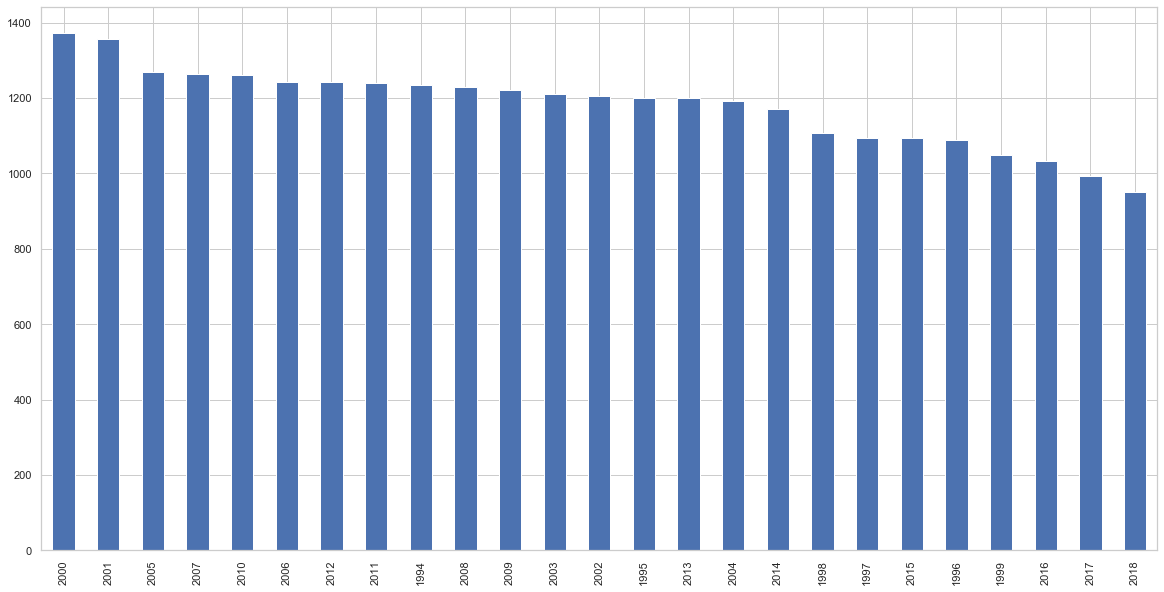

In [21]:
##Visualization of Report year
FUD["Report year"].value_counts().plot(kind = "bar")

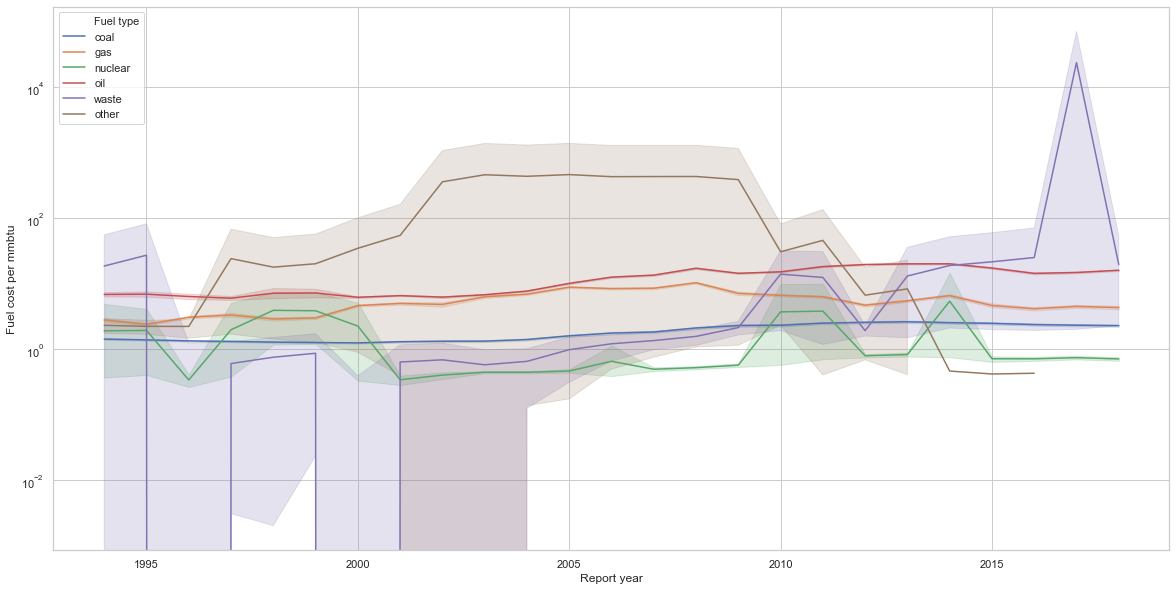

In [23]:
g = sns.lineplot(data = FUD, hue = "Fuel type", x = "Report year", y = "Fuel cost per mmbtu")
g.set_yscale("log")

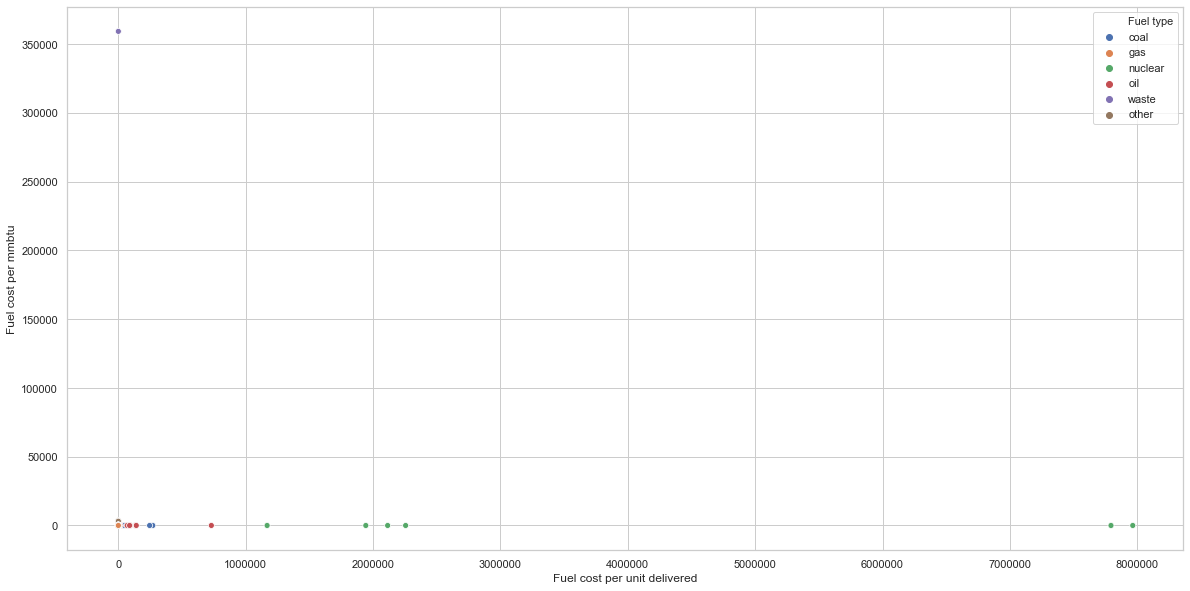

In [26]:
g = sns.scatterplot(data = FUD, x = "Fuel cost per unit delivered", hue = "Fuel type", y = "Fuel cost per mmbtu" )

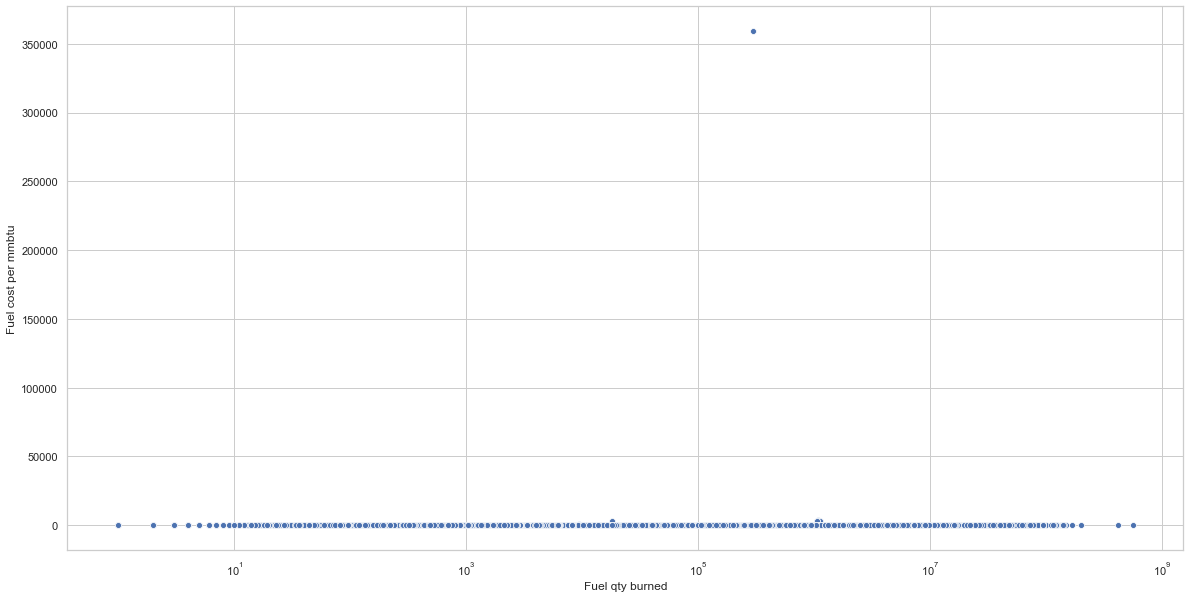

In [31]:
g = sns.scatterplot(data = FUD, x = "Fuel qty burned", y = "Fuel cost per mmbtu" )
g.set_xscale("log")

NameError: name 'plot' is not defined

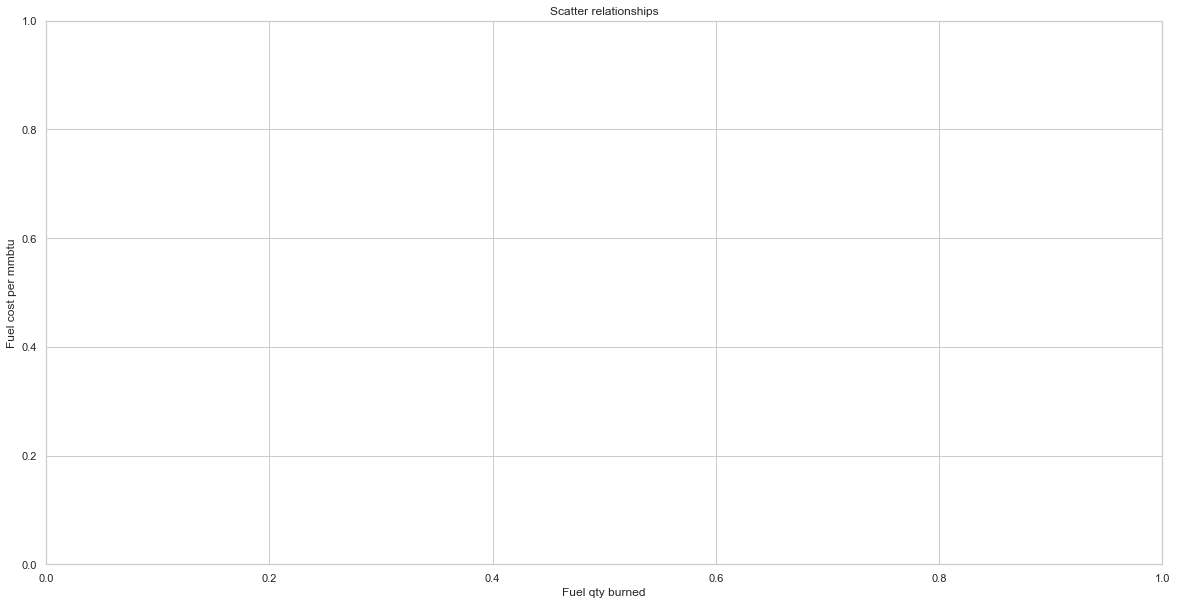

In [34]:
x = FUD["Fuel qty burned"]
y = FUD ["Fuel cost per mmbtu"]
plt.title("Scatter relationships")
plt.ylabel("Fuel cost per mmbtu")
plt.xlabel("Fuel qty burned")
plot.scatter(x,y)
plt.show()

[(50, 80000)]

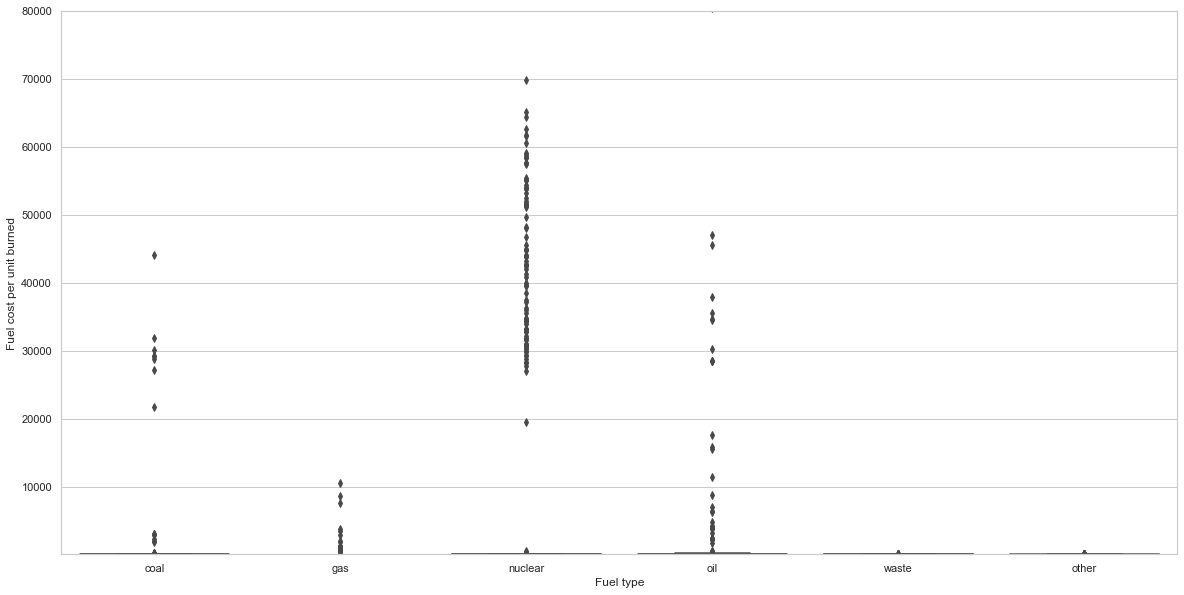

In [42]:
g = sns.boxplot(data = FUD, y = "Fuel cost per unit burned", x = "Fuel type")
g.set(ylim=(50, 80000))

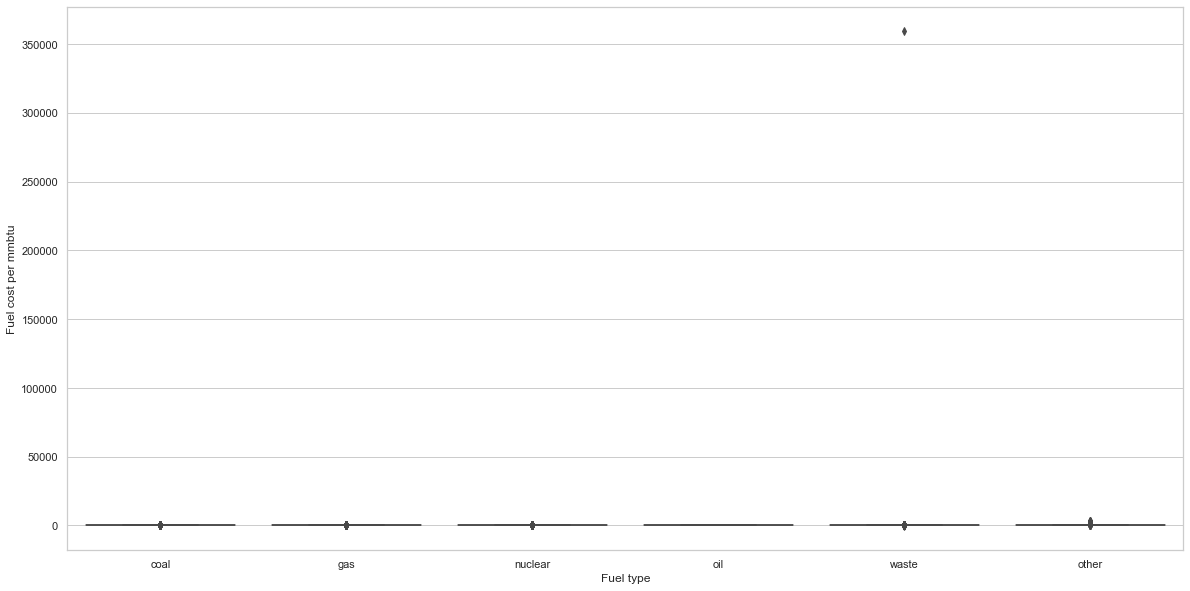

In [32]:
sns.boxplot(data = FUD, y = "Fuel cost per mmbtu", x = "Fuel type")

In [ ]:
g = sns.scatterplot(data = FUD, x = "Fuel cost per unit delivered", hue = "Fuel type", y = "Fuel cost per mmbtu" )